In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Import Libraries

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.5 MB/s eta 0:00:00


In [3]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import tensorflow
from wordcloud import WordCloud

## Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import text, sequence
from tensorflow. keras .preprocessing.sequence import pad_sequences
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
import transformers

# Sklearn Library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

## NLP Specific
from tokenizers import BertWordPieceTokenizer
from emoji import demojize
from itertools import chain
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/stock_data (0) (1).csv')

In [7]:
print("Column headings:")
print(df.columns)

Column headings:
Index(['Text', 'Sentiment'], dtype='object')


# Preprocessing

In [8]:
# remove rows with nan values
df = df.dropna(how = 'any',axis = 0)
print(df.head(5))

                                                Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1


In [9]:
df.describe()

,Sentiment
count,5791.000000
mean,0.636332
std,0.481096
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [11]:
print(df.shape)

(5791, 2)


In [12]:
df['Sentiment'].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Class-wise Distribution')

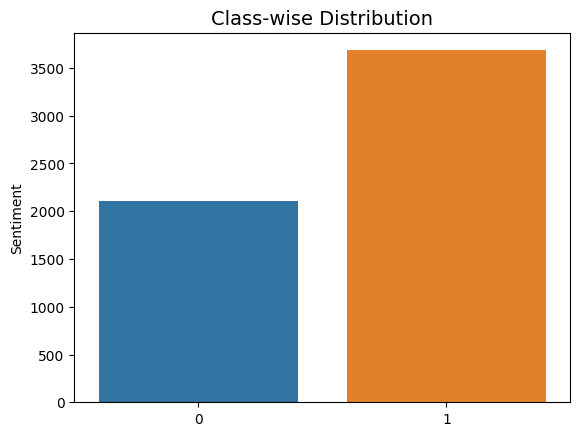

In [13]:
# distribution of dataset labels

class_names = ['Positive', 'Negative']
label_count = df['Sentiment'].value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Class-wise Distribution',fontsize =14)

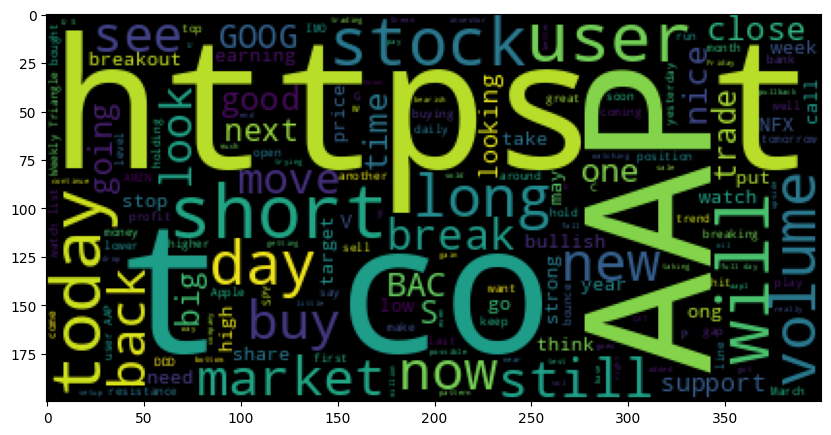

In [14]:
text=''.join(df['Text'].tolist())
wordcloud=WordCloud().generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)

In [15]:
# Maximum length of the tweets
df['Text'].apply(lambda x:len(str(x).split())).max()

32

In [16]:
print(df.head(3))

                                                Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1


In [17]:
to_replace = { "ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [18]:
'''
 """
    Expects tweets to be a pandas series
    • Lower-casing

    • Normalizing URLs

    • Normalizing Tags and email addresses

    • Normalizing Numbers

    • Normalizing Dollars

    • Word Stemming

    • Normalize punctuation

    • Expand Contractions

    • Demojize

    • Remove punctuation

'''

import spacy
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_tweet(tweet):

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)

    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)

    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)

    ## Remove word rt
    tweet = re.sub(r"rt", '' ,tweet)

    # Tokenize the tweet
    tokens = nltk.word_tokenize(tweet)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Expand Contractions
    #tokens = tokens.apply(lambda string: " ".join([to_replace[i] if i in to_replace.keys() else i for i in string.split()]))


    # Tokenize the tweet using spaCy
#    doc = nlp(tweet)
 #   tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join tokens back into a single string
    processed_tweet = ' '.join(tokens)

    return processed_tweet



In [19]:
# Preprocessing the tweets
df['processed_tweet'] = df['Text'].apply(preprocess_tweet)

In [20]:
print("Preprocessed Tweet")
df.head(3)

Preprocessed Tweet


,Text,Sentiment,processed_tweet
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movie 55 return feageed indicator 15 ...
2,user I'd be afraid to short AMZN - they are lo...,1,user id afraid sho amzn looking like nearmonop...


In [21]:
# Encode the labels
#label_encoder = LabelEncoder()
#df['ns_label'] = label_encoder.fit_transform(df['ns_label'])

# Split the dataset into training and testing sets
X_Original = df['processed_tweet']
y = df['Sentiment']
x = X_Original


In [22]:
maxlen = 32
max_words = 200000
embedding_size=150
lr = 1e-3
lr_d = 0

In [23]:
#tokenizer = Tokenizer(num_words=max_words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)

In [24]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10844 unique tokens.
Shape of data tensor: (5791, 32)
Shape of label tensor: (5791,)


In [25]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

--2023-08-17 04:15:44--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2023-08-17 04:15:44--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2023-08-17 04:15:44--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [ap

In [26]:
embeddings_index = {}
f = open('glove.twitter.27B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [27]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2, random_state = 42)
print("x train shape",x_train.shape)
print("y train shape",y_train.shape)
print("x test shape",x_test.shape)
print("y test shape",y_test.shape)

x train shape (4632, 32)
y train shape (4632,)
x test shape (1159, 32)
y test shape (1159,)


In [29]:
y_train

array([1, 1, 1, ..., 0, 0, 1])

# Deep Learning Based Model
# 1. Simple RNN

In [30]:
import tensorflow as tf

In [31]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           20000000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20,020,201
Trainable params: 20,020,201
Non-trainable params: 0
_________________________________________________________________


In [32]:
y_train.shape

(4632,)

In [33]:
batch_size= 32
epochs = 10
hist = model.fit(x_train,y_train,validation_split= 0.1, batch_size = batch_size,
                 epochs=epochs, verbose = 1)

Epoch 1/10
131/131 [==============================] - 72s 530ms/step - loss: 0.6508 - accuracy: 0.6250 - val_loss: 0.6009 - val_accuracy: 0.6789
Epoch 2/10
131/131 [==============================] - 74s 567ms/step - loss: 0.5076 - accuracy: 0.7529 - val_loss: 0.5787 - val_accuracy: 0.7134
Epoch 3/10
131/131 [==============================] - 70s 531ms/step - loss: 0.3535 - accuracy: 0.8474 - val_loss: 0.5951 - val_accuracy: 0.7155
Epoch 4/10
131/131 [==============================] - 79s 599ms/step - loss: 0.2046 - accuracy: 0.9268 - val_loss: 0.6995 - val_accuracy: 0.7220
Epoch 5/10
131/131 [==============================] - 74s 560ms/step - loss: 0.0894 - accuracy: 0.9741 - val_loss: 0.7863 - val_accuracy: 0.7155
Epoch 6/10
131/131 [==============================] - 70s 532ms/step - loss: 0.0340 - accuracy: 0.9933 - val_loss: 0.8981 - val_accuracy: 0.7284
Epoch 7/10
131/131 [==============================] - 76s 579ms/step - loss: 0.0156 - accuracy: 0.9974 - val_loss: 0.9804 - val_ac

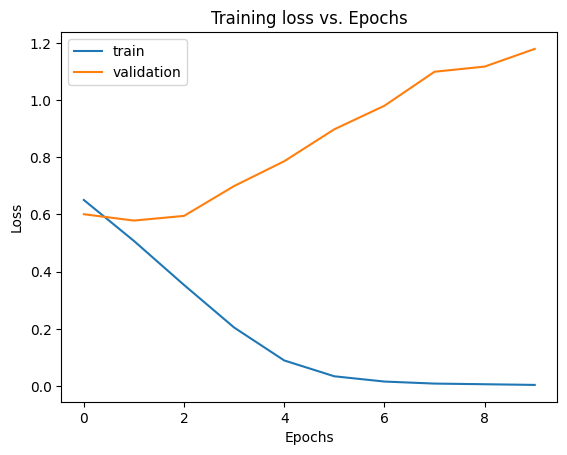

In [34]:
# Plot loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')
plt.legend()
plt.show()

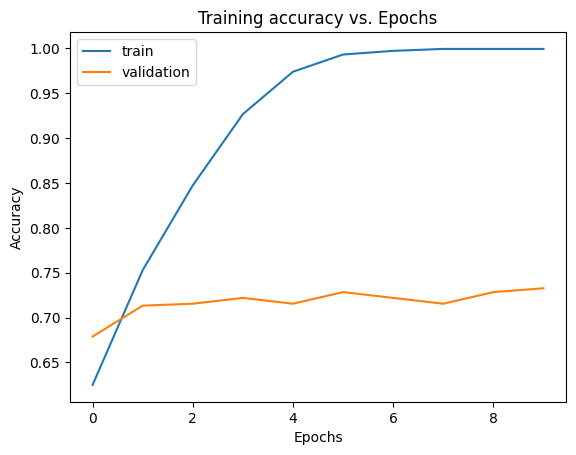

In [35]:
# Plot accuracy
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Epochs')
plt.legend()
plt.show()

In [36]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred,axis=1)

37/37 [==============================] - 0s 5ms/step


In [37]:
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

37/37 [==============================] - 0s 8ms/step - loss: 1.1981 - accuracy: 0.7360
Test Accuracy:  73.6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.3684    1.0000    0.5385       427
           1     0.0000    0.0000    0.0000       732

    accuracy                         0.3684      1159
   macro avg     0.1842    0.5000    0.2692      1159
weighted avg     0.1357    0.3684    0.1984      1159



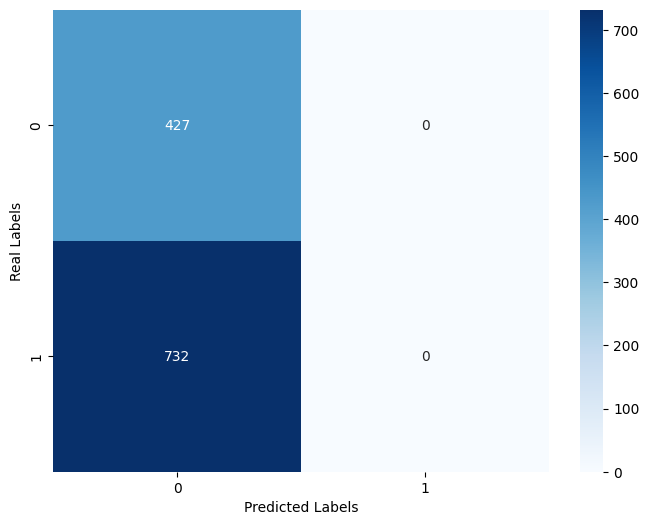

In [38]:
#confusion Matrix
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

# print classification report
print(classification_report(y_test, y_pred, digits  = 4))

# 2. LSTM

In [39]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.layers[0].set_weights([embedding_matrix])
lstm_model.layers[0].trainable = False

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 100)           20000000  
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,080,501
Trainable params: 80,501
Non-trainable params: 20,000,000
_________________________________________________________________


In [40]:
batch_size= 32
epochs = 5
hist = lstm_model.fit(x_train,y_train,validation_split= 0.1, batch_size = batch_size,
                 epochs=epochs, verbose = 1)

Epoch 1/5
131/131 [==============================] - 8s 39ms/step - loss: 0.6308 - accuracy: 0.6593 - val_loss: 0.5872 - val_accuracy: 0.7026
Epoch 2/5
131/131 [==============================] - 7s 52ms/step - loss: 0.5647 - accuracy: 0.7131 - val_loss: 0.5770 - val_accuracy: 0.7241
Epoch 3/5
131/131 [==============================] - 5s 39ms/step - loss: 0.5300 - accuracy: 0.7330 - val_loss: 0.5530 - val_accuracy: 0.7134
Epoch 4/5
131/131 [==============================] - 4s 34ms/step - loss: 0.4898 - accuracy: 0.7642 - val_loss: 0.5656 - val_accuracy: 0.7306
Epoch 5/5
131/131 [==============================] - 6s 46ms/step - loss: 0.4419 - accuracy: 0.7898 - val_loss: 0.5706 - val_accuracy: 0.7500


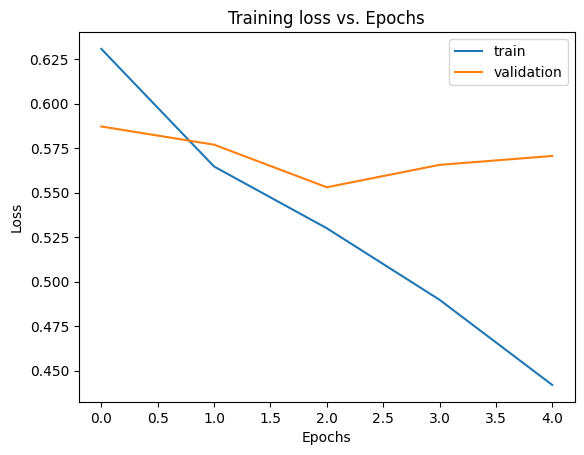

In [41]:
# Plot loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')
plt.legend()
plt.show()

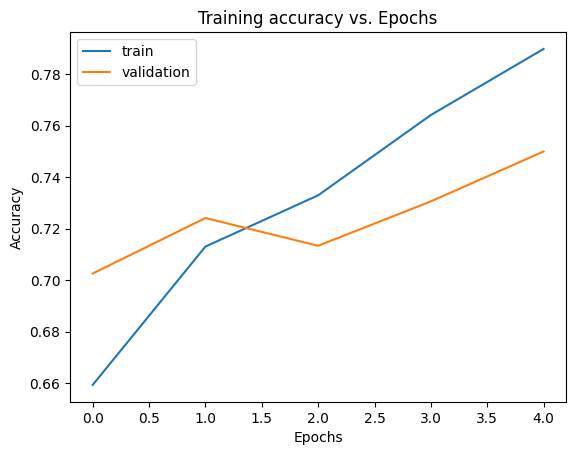

In [42]:
# Plot accuracy
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Epochs')
plt.legend()
plt.show()

In [43]:
pred = lstm_model.predict(x_test,verbose=1)
y_pred = np.argmax(pred,axis=1)

37/37 [==============================] - 1s 12ms/step


In [44]:
loss,acc = lstm_model.evaluate(x_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

37/37 [==============================] - 1s 14ms/step - loss: 0.5325 - accuracy: 0.7299
Test Accuracy:  72.99


              precision    recall  f1-score   support

           0     0.3684    1.0000    0.5385       427
           1     0.0000    0.0000    0.0000       732

    accuracy                         0.3684      1159
   macro avg     0.1842    0.5000    0.2692      1159
weighted avg     0.1357    0.3684    0.1984      1159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


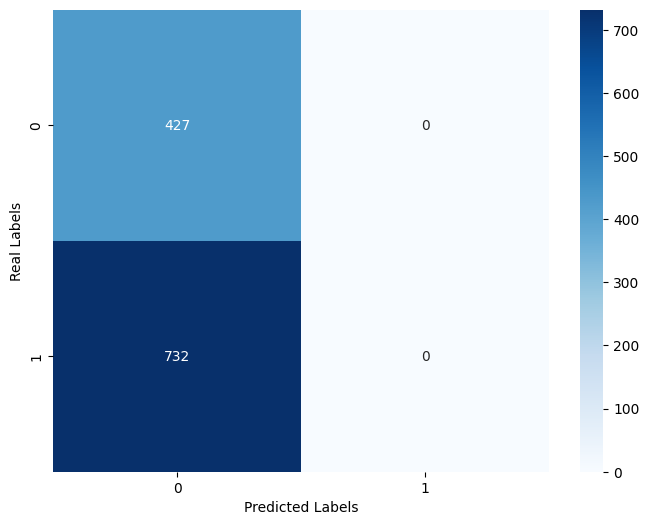

In [45]:
#confusion Matrix
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

# print classification report
print(classification_report(y_test, y_pred, digits  = 4))

# 3. Multi Layer Perceptron (MLP)

In [46]:
from keras.layers import Flatten

mlp_model = Sequential()
mlp_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
mlp_model.add(Flatten())
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.layers[0].set_weights([embedding_matrix])
mlp_model.layers[0].trainable = False

mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 100)           20000000  
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                102432    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,102,465
Trainable params: 102,465
Non-trainable params: 20,000,000
_________________________________________________________________


In [47]:
batch_size= 32
epochs = 5
hist = mlp_model.fit(x_train,y_train,validation_split= 0.1, batch_size = batch_size,
                 epochs=epochs, verbose = 1)

Epoch 1/5
131/131 [==============================] - 2s 11ms/step - loss: 0.6458 - accuracy: 0.6500 - val_loss: 0.6126 - val_accuracy: 0.6724
Epoch 2/5
131/131 [==============================] - 1s 10ms/step - loss: 0.5186 - accuracy: 0.7584 - val_loss: 0.5863 - val_accuracy: 0.6983
Epoch 3/5
131/131 [==============================] - 1s 7ms/step - loss: 0.4181 - accuracy: 0.8244 - val_loss: 0.5914 - val_accuracy: 0.6767
Epoch 4/5
131/131 [==============================] - 1s 6ms/step - loss: 0.3237 - accuracy: 0.8834 - val_loss: 0.6521 - val_accuracy: 0.6875
Epoch 5/5
131/131 [==============================] - 1s 5ms/step - loss: 0.2438 - accuracy: 0.9244 - val_loss: 0.6503 - val_accuracy: 0.6897


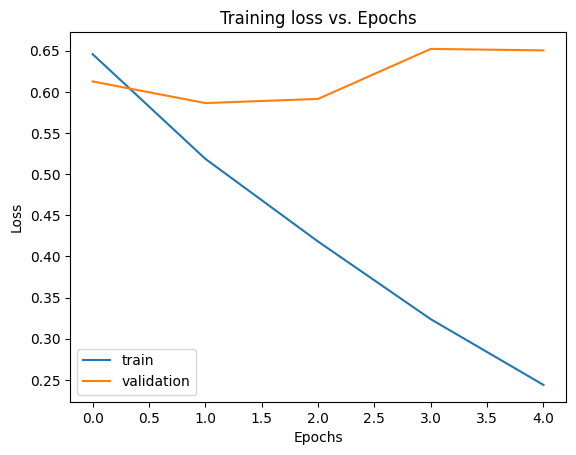

In [48]:
# Plot loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')
plt.legend()
plt.show()

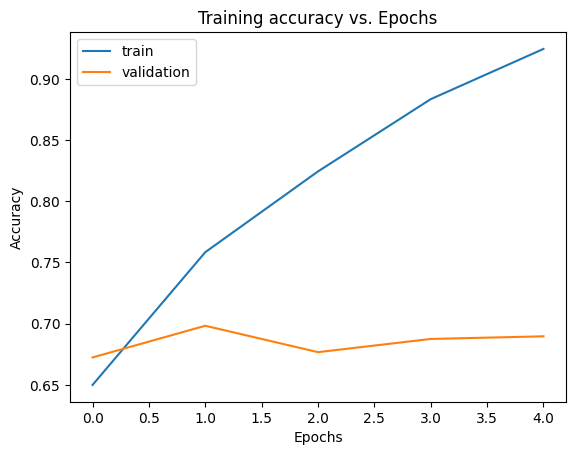

In [49]:
# Plot accuracy
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Epochs')
plt.legend()
plt.show()

In [50]:
pred = mlp_model.predict(x_test,verbose=1)
y_pred = np.argmax(pred,axis=1)

37/37 [==============================] - 0s 2ms/step


In [54]:

loss,acc = mlp_model.evaluate(x_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

37/37 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.6790
Test Accuracy:  67.9


              precision    recall  f1-score   support

           0     0.3684    1.0000    0.5385       427
           1     0.0000    0.0000    0.0000       732

    accuracy                         0.3684      1159
   macro avg     0.1842    0.5000    0.2692      1159
weighted avg     0.1357    0.3684    0.1984      1159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


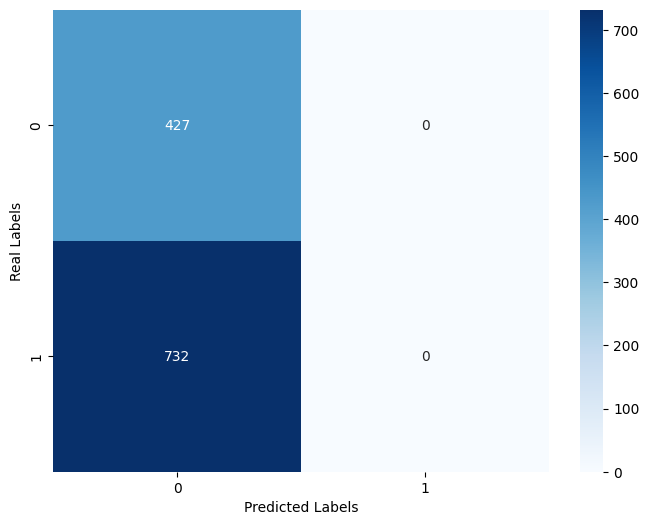

In [55]:
#confusion Matrix
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

# print classification report
print(classification_report(y_test, y_pred, digits  = 4))

# CNN Model

In [56]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.layers[0].set_weights([embedding_matrix])
lstm_model.layers[0].trainable = False

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 100)           20000000  
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,080,501
Trainable params: 80,501
Non-trainable params: 20,000,000
_________________________________________________________________


In [57]:
batch_size= 32
epochs = 5
hist = lstm_model.fit(x_train,y_train,validation_split= 0.1, batch_size = batch_size,
                 epochs=epochs, verbose = 1)

Epoch 1/5
131/131 [==============================] - 8s 42ms/step - loss: 0.6208 - accuracy: 0.6701 - val_loss: 0.5790 - val_accuracy: 0.7155
Epoch 2/5
131/131 [==============================] - 6s 44ms/step - loss: 0.5580 - accuracy: 0.7164 - val_loss: 0.5733 - val_accuracy: 0.7047
Epoch 3/5
131/131 [==============================] - 6s 42ms/step - loss: 0.5212 - accuracy: 0.7390 - val_loss: 0.5583 - val_accuracy: 0.7155
Epoch 4/5
131/131 [==============================] - 4s 33ms/step - loss: 0.4872 - accuracy: 0.7610 - val_loss: 0.5431 - val_accuracy: 0.7371
Epoch 5/5
131/131 [==============================] - 8s 64ms/step - loss: 0.4449 - accuracy: 0.7946 - val_loss: 0.5714 - val_accuracy: 0.7328


In [58]:
pred = lstm_model.predict(x_test,verbose=1)
y_pred = np.argmax(pred,axis=1)

37/37 [==============================] - 1s 12ms/step


In [59]:
loss,acc = lstm_model.evaluate(x_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

37/37 [==============================] - 0s 12ms/step - loss: 0.5500 - accuracy: 0.7239
Test Accuracy:  72.39


In [60]:
#confusion Matrix
# print classification report
print(classification_report(y_test, y_pred, digits  = 4))

              precision    recall  f1-score   support

           0     0.3684    1.0000    0.5385       427
           1     0.0000    0.0000    0.0000       732

    accuracy                         0.3684      1159
   macro avg     0.1842    0.5000    0.2692      1159
weighted avg     0.1357    0.3684    0.1984      1159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
